In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
# copy paste this code to the beginning of your script to set the plotting style for a two column figure

from matplotlib import pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
    # "figure.constrained_layout.use": True
})

plt.rcParams["figure.autolayout"] = False # set to True if you want to use constrained_layout

plt.rcParams["savefig.bbox"] = None
plt.rcParams["figure.figsize"] = (5.9,3)
plt.rcParams["figure.titlesize"] = 10 # this is only for plt.suptitle, i set it to be the same as the rest

plt.rcParams["axes.titlesize"] = 10 # control title size
plt.rcParams["axes.labelsize"] = 10 # control x and y axis labels
plt.rcParams["axes.labelpad"] = 4.0 # distance between axis label and axis numbers
plt.rcParams["xtick.labelsize"] = 10 # independent control of xlabel fontsize
plt.rcParams["ytick.labelsize"] = 10 # independent control of ylabel fontsize

plt.rcParams["legend.fontsize"] = 7.5 # control legend size, I set it to be slightly smaller than title/axes label
# plt.rcParams["legend.facecolor"] = (0.9, 0.9, 0.9) # legend background color
# plt.rcParams["legend.edgecolor"] = (0, 0, 0) # legend border line color
# plt.rcParams["legend.frameon"] = True # whether or not to draw a border around legend
# plt.rcParams["legend.framealpha"] = 0.1 # legend background transparency
plt.rcParams["legend.loc"] = "upper left" # default legend location
plt.rcParams["legend.handletextpad"] = 0.8  # Horizontal space between legend point and text (default 0.8)
plt.rcParams["legend.labelspacing"] = 0.6  # Vertical space between legend entries (default 0.5)
# plt.rcParams["legend.columnspacing"] = 2.0  # Space between columns in multi-column legends
# plt.rcParams["legend.borderpad"] = 1.0  # Space between legend content and the box
# plt.rcParams["legend.handlelength"] = 2.0  # Length of legend marker lines

plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 6 #data point size

# CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"
plt.rcParams["lines.linewidth"] = 1
plt.rcParams["lines.markersize"] = 6 #data point size
plt.rcParams["lines.markeredgewidth"] = 1.5 # width of the edge of the marker
# plt.rcParams["lines.markeredgecolor"] = "black" # color of the edge of the marker
plt.rcParams["lines.markerfacecolor"] = "crimson" # color of the inside of the marker
plt.rcParams["lines.marker"] = "o" # marker type, see https://matplotlib.org/stable/api/markers_api.html for all options
plt.rcParams["lines.color"] = "black" # color of the line
# # CHOOSE NICE COLOR FOR DARK MARKER EDGEWIDTH FROM "dodgerblue","mediumseagreen","crimson","mediumpurple","slateblue","darkorange","peru","goldenrod"

plt.rcParams["grid.linestyle"] = "--"
plt.rcParams['axes.grid'] = True
# plt.rcParams["grid.linewidth"] = 0.7

# plt.rcParams["xtick.major.pad"] = 4.0 # distance between xticks dashes and xaxis numbers
# plt.rcParams["xtick.major.size"] = 3.0
# plt.rcParams["xtick.major.width"] = 0.7
# plt.rcParams["ytick.major.pad"] = 4.0 # distance between yticks dashes and yaxis numbers
# plt.rcParams["ytick.major.size"] = 3.0
# plt.rcParams["ytick.major.width"] = 0.7





# plot two figures side by side
# fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True, constrained_layout=True)
# plt.subplots_adjust(left=0.2, right=0.8, top=0.8, bottom=0.2) # remove unnecessary white space how i like it, this is manual very of use constrained_layout

# That warning is because matplotlib’s default layout engine has changed in recent
# versions to use constrained_layout, which is incompatible with subplots_adjust and tight_layout. 
# If you try to use plt.subplots_adjust when constrained_layout=True, matplotlib will raise that warning and ignore the call.
# If you're manually adjusting spacing, disable constrained_layout when you create the figure:

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Path to your CSV file
#file_path = r'C:\Users\Dell\OneDrive - University of Cambridge\Shared Documents - PHY_US Group\MBQD-Shared\AION\Personnel\Yijun\code\ringdown\ringdown.csv'
file_path = r'ringdown_20250226.csv'

# Read the CSV file starting from row 3 (skip the first 2 rows) and only read the first and third columns
df = pd.read_csv(file_path, skiprows=2, usecols=[0, 1])

# Drop rows with NaN values in the selected columns
df = df.dropna(subset=[df.columns[0], df.columns[1]])

# t in second (first column)
t = df.iloc[:, 0].values

# v in volts (third column)
v = df.iloc[:, 1].values

# Convert to numpy arrays
t = np.array(t) 
v = np.array(v)

t1, t2 = 23500, -1
t_subset = t[t1:t2] * 1e6 + 18.227999999999998  # t in us
v_subset = v[t1:t2] # signal in V

Tau: 21.08958473 ± 0.04150610 μs
Finesse: 198765.0 +/- 391.0


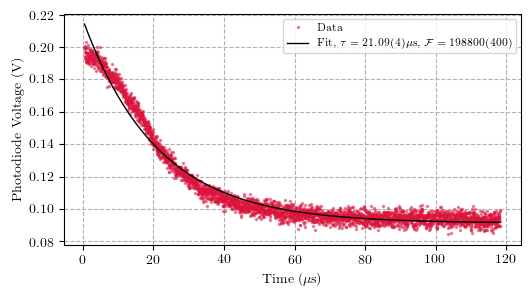

In [ ]:
x = t_subset
y = v_subset

# Fit an exponential decay to the data
from scipy.optimize import curve_fit
def exp_decay(x, a, b, c):
    return a * np.exp(-b * x) + c
# Fit the data to the exponential decay function
popt, pcov = curve_fit(exp_decay, x, y, p0=[10,1,1])

tau = 1/popt[1]
tau_err = 1/(popt[1]**2)*(np.sqrt(np.diag(pcov))[1])

FSR = 1.5e9 # Free spectral range of the cavity in Hz
finesse =  np.round(2* np.pi * FSR * tau * 1e-6)
finesse_err = np.round(2 * np.pi * FSR * tau_err * 1e-6)

# Generate x values for the fitted curve
x_fit = np.linspace(min(x), max(x), 100)
# Generate y values for the fitted curve
y_fit = exp_decay(x_fit, *popt)



# Plot the data and the fitted curve
plt.plot(x[::10], y[::10], '.', color='crimson', label='Data', markersize=2,alpha=0.5)
plt.plot(x_fit, y_fit, '-', color='black', label=r'Fit, $\tau = %.2f (%.d) \mu$s, $\mathcal{F}=%.d(%.d)$'%(tau,tau_err*100,np.round(finesse,-2),np.round(finesse_err,-2)), linewidth=1)
plt.legend(loc='upper right')

plt.xlabel(r'Time ($\mu$s)')
plt.ylabel('Photodiode Voltage (V)')

print(f'Tau: {tau:.8f} ± {tau_err:.8f} μs')
print(f'Finesse: {finesse} +/- {finesse_err}')

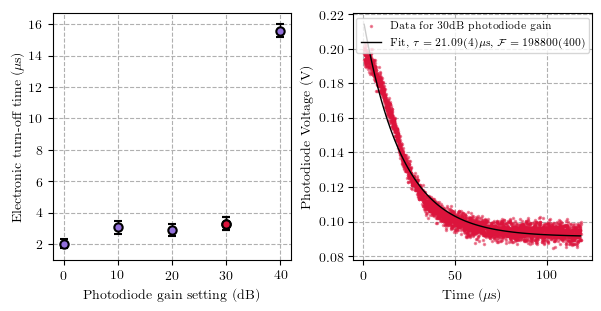

In [38]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True)

gain_setting = np.array([0,10,20,30,40])
turnoff_time = np.array([2.02, 3.06,2.9,3.3,15.6])
turnoff_time_err = np.array([0.3, 0.4,0.4,0.4,0.4])

ax1.errorbar(gain_setting, turnoff_time, yerr=turnoff_time_err, fmt='ko', markerfacecolor='mediumpurple',
             capsize=3, elinewidth=1)
ax1.set_xlabel("Photodiode gain setting (dB)")
ax1.set_ylabel(r"Electronic turn-off time ($\mu$s)")
ax1.errorbar(gain_setting[3], turnoff_time[3], yerr=turnoff_time_err[3], fmt='ko', markerfacecolor='crimson',
            capsize=3, elinewidth=1)


# Plot the data and the fitted curve
ax2.plot(x[::10], y[::10], '.', color='crimson', label='Data for 30dB photodiode gain', markersize=2,alpha=0.5)
ax2.plot(x_fit, y_fit, '-', color='black', label=r'Fit, $\tau = %.2f (%.d) \mu$s, $\mathcal{F}=%.d(%.d)$'%(tau,tau_err*100,np.round(finesse,-2),np.round(finesse_err,-2)), linewidth=1)
ax2.legend(loc='upper right',bbox_to_anchor=(1.01, 1))

ax2.set_xlabel(r'Time ($\mu$s)')
ax2.set_ylabel('Photodiode Voltage (V)')

plt.savefig('250525 PDHRingdownPlots.pdf',dpi=300)